In [0]:
# Education - Udacity "Intro to TensorFlow for Deep Learning"
# Module: Flower Classifier Exercise
# Ref: https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c03_exercise_flowers_with_data_augmentation.ipynb#scrollTo=G1ymuCPS0_eu

In [1]:
# Import packages.
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import glob
import shutil
import matplotlib.pyplot as plt
import numpy as np
import logging

# Using version 2.x of Tensorflow.
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Tensorflow.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set logging level.
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Print Tensorflow version.
print('TensorFlow Version:', tf.__version__)

TensorFlow 2.x selected.
TensorFlow Version: 2.1.0-rc1


In [2]:
# Download dataset.
print('Download dataset....')
data_url  = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
file_zip  = tf.keras.utils.get_file('flower_photos.tgz', origin=data_url, extract=True)
print('Download dataset completed.')

Download dataset....
228818944/228813984 [==============================] - 1s 0us/step
Download dataset completed.


In [3]:
# List directories.
dir_root  = os.path.join(os.path.dirname(file_zip))
dir_base  = os.path.join(dir_root, 'flower_photos')
dir_train = os.path.join(dir_base, 'train')
dir_val   = os.path.join(dir_base, 'validate')
classes   = [ 'daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

print('-----------------------')
print('- List Root Directory -')
print('-----------------------')
!ls -lh $dir_root
print('-----------------------')
print('-----------------------')
print('- List Base Directory -')
print('-----------------------')
!ls -lh $dir_base
print('-----------------------')

-----------------------
- List Root Directory -
-----------------------
total 219M
drwxr-x--- 7 270850 5000 4.0K Feb 10  2016 flower_photos
-rw-r--r-- 1 root   root 219M Jan  3 11:55 flower_photos.tgz
-----------------------
-----------------------
- List Base Directory -
-----------------------
total 608K
drwx------ 2 270850 5000  36K Feb 10  2016 daisy
drwx------ 2 270850 5000  48K Feb 10  2016 dandelion
-rw-r----- 1 270850 5000 409K Feb  9  2016 LICENSE.txt
drwx------ 2 270850 5000  36K Feb 10  2016 roses
drwx------ 2 270850 5000  36K Feb 10  2016 sunflowers
drwx------ 2 270850 5000  40K Feb 10  2016 tulips
-----------------------


In [4]:
# Moving data into respective classes.
print('Prepare data and directories....')
for i in classes:
  path_img    = os.path.join(dir_base, i)
  path_train  = os.path.join(dir_train, i)
  path_val    = os.path.join(dir_val, i)
  images      = glob.glob(path_img + '/*.jpg')

  print('  Process {}: {} images'.format(i, len(images)))
  if len(images) == 0:
    print('  No image available, skip the process.')
    continue

  # Seperate 80% to train and 20% to validation.
  train     = images[:round(len(images) * 0.8)] # [0, 80]
  validate  = images[round(len(images) * 0.8):] # [80, 100]

  print('    Train data:   ', len(train))
  print('    Validate data:', len(validate))

  # Move into respective directory, create directory if not exists.
  for t in train:
    if not os.path.exists(path_train):
      os.makedirs(path_train)
    shutil.move(t, path_train)

  for v in validate:
    if not os.path.exists(path_val):
      os.makedirs(path_val)
    shutil.move(v, path_val)
print('Prepare data completed.')

Prepare data and directories....
  Process daisy: 633 images
    Train data:    506
    Validate data: 127
  Process dandelion: 898 images
    Train data:    718
    Validate data: 180
  Process roses: 641 images
    Train data:    513
    Validate data: 128
  Process sunflowers: 699 images
    Train data:    559
    Validate data: 140
  Process tulips: 799 images
    Train data:    639
    Validate data: 160
Prepare data completed.


In [5]:
print('-- Summary --')
print('Classes:       ', classes)
print('Dir Root:      ', dir_root)
print('Dir Base:      ', dir_base)
print('Dir Train:     ', dir_train)

for i in classes:
  path    = os.path.join(dir_train, i)
  images  = os.listdir(path)
  print('  {} ({}) images'.format(len(images), i))

print('Dir Validate:  ', dir_val)
for i in classes:
  path    = os.path.join(dir_val, i)
  images  = os.listdir(path)
  print('  {} ({}) images'.format(len(images), i))

-- Summary --
Classes:        ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Dir Root:       /root/.keras/datasets
Dir Base:       /root/.keras/datasets/flower_photos
Dir Train:      /root/.keras/datasets/flower_photos/train
  506 (daisy) images
  718 (dandelion) images
  513 (roses) images
  559 (sunflowers) images
  639 (tulips) images
Dir Validate:   /root/.keras/datasets/flower_photos/validate
  127 (daisy) images
  180 (dandelion) images
  128 (roses) images
  140 (sunflowers) images
  160 (tulips) images


Found 2935 images belonging to 5 classes.


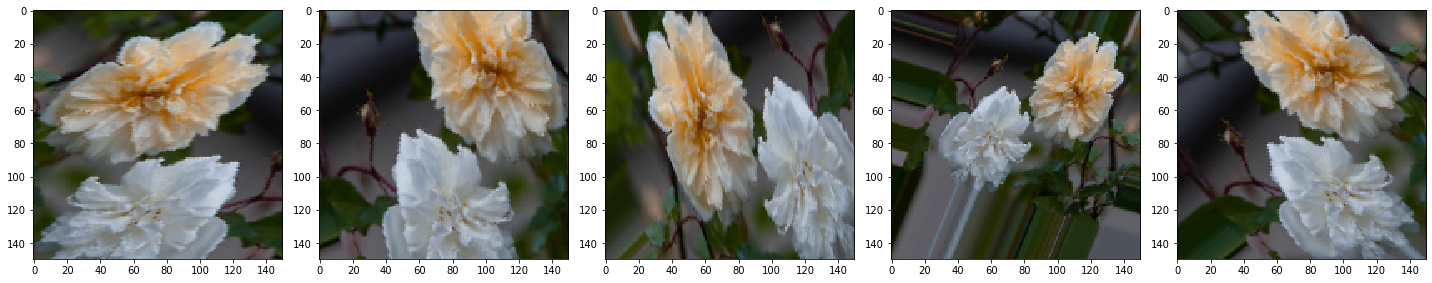

In [6]:
# Apply augmentation.
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables.
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels.

train_image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    zoom_range=0.5,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15
)
train_data_gen = train_image_gen.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=dir_train,
    shuffle=True,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='sparse'
)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes      = axes.flatten()
  for img, ax in zip( images, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [7]:
# Create validate set.
val_image_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = val_image_gen.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=dir_val,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='sparse'
)

Found 735 images belonging to 5 classes.


In [0]:
# Build the model.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# The exercise suggestion solution.
model_suggestiong = tf.keras.models.Sequential([
    # Why use padding='same'?
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),

    # Why don't add dropout after each 'max pooling' layer?

    # Why add dropout after flatten?
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),

    # Why add dropout here?
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [0]:
# Compile the model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Print summary.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 64)        0

In [23]:
# Summary.
EPOCHS = 80
EPOCH_STEP_TRAIN = int(np.ceil(train_data_gen.n / BATCH_SIZE))
EPOCH_STEP_VALIDATE = int(np.ceil(val_data_gen.n / BATCH_SIZE))
print('-- Summary Data --')
print('Total Train Data:      ', train_data_gen.n)
print('Total Validataion Data:', val_data_gen.n)
print('Total Epochs:          ', EPOCHS)
print('Epoch Step (Train):    ', EPOCH_STEP_TRAIN)
print('Epoch Step (Validate): ', EPOCH_STEP_VALIDATE)

-- Summary Data --
Total Train Data:       2935
Total Validataion Data: 735
Total Epochs:           80
Epoch Step (Train):     30
Epoch Step (Validate):  8


In [24]:
# Train the model.
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=EPOCH_STEP_TRAIN,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=EPOCH_STEP_VALIDATE
)

Train for 30 steps, validate for 8 steps
Epoch 1/80
30/30 [==============================] - 27s 901ms/step - loss: 1.5215 - accuracy: 0.3407 - val_loss: 1.1860 - val_accuracy: 0.4966
Epoch 2/80
30/30 [==============================] - 23s 755ms/step - loss: 1.1756 - accuracy: 0.4910 - val_loss: 1.0523 - val_accuracy: 0.6014
Epoch 3/80
30/30 [==============================] - 22s 741ms/step - loss: 1.0514 - accuracy: 0.5744 - val_loss: 1.1144 - val_accuracy: 0.5673
Epoch 4/80
30/30 [==============================] - 22s 742ms/step - loss: 0.9871 - accuracy: 0.6048 - val_loss: 1.0000 - val_accuracy: 0.6218
Epoch 5/80
30/30 [==============================] - 22s 743ms/step - loss: 0.9466 - accuracy: 0.6293 - val_loss: 0.8652 - val_accuracy: 0.6449
Epoch 6/80
30/30 [==============================] - 22s 747ms/step - loss: 0.9159 - accuracy: 0.6422 - val_loss: 0.8280 - val_accuracy: 0.6735
Epoch 7/80
30/30 [==============================] - 22s 743ms/step - loss: 0.8848 - accuracy: 0.6630 

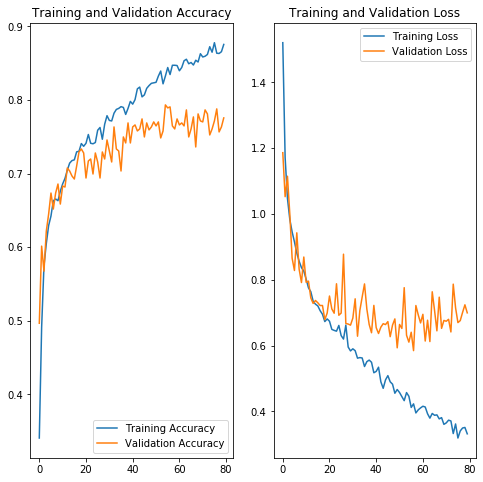

In [25]:
# Visualize the result.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Based on our model, we should probably stop the training after 30 epochs.

Classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Fails:   30.0%


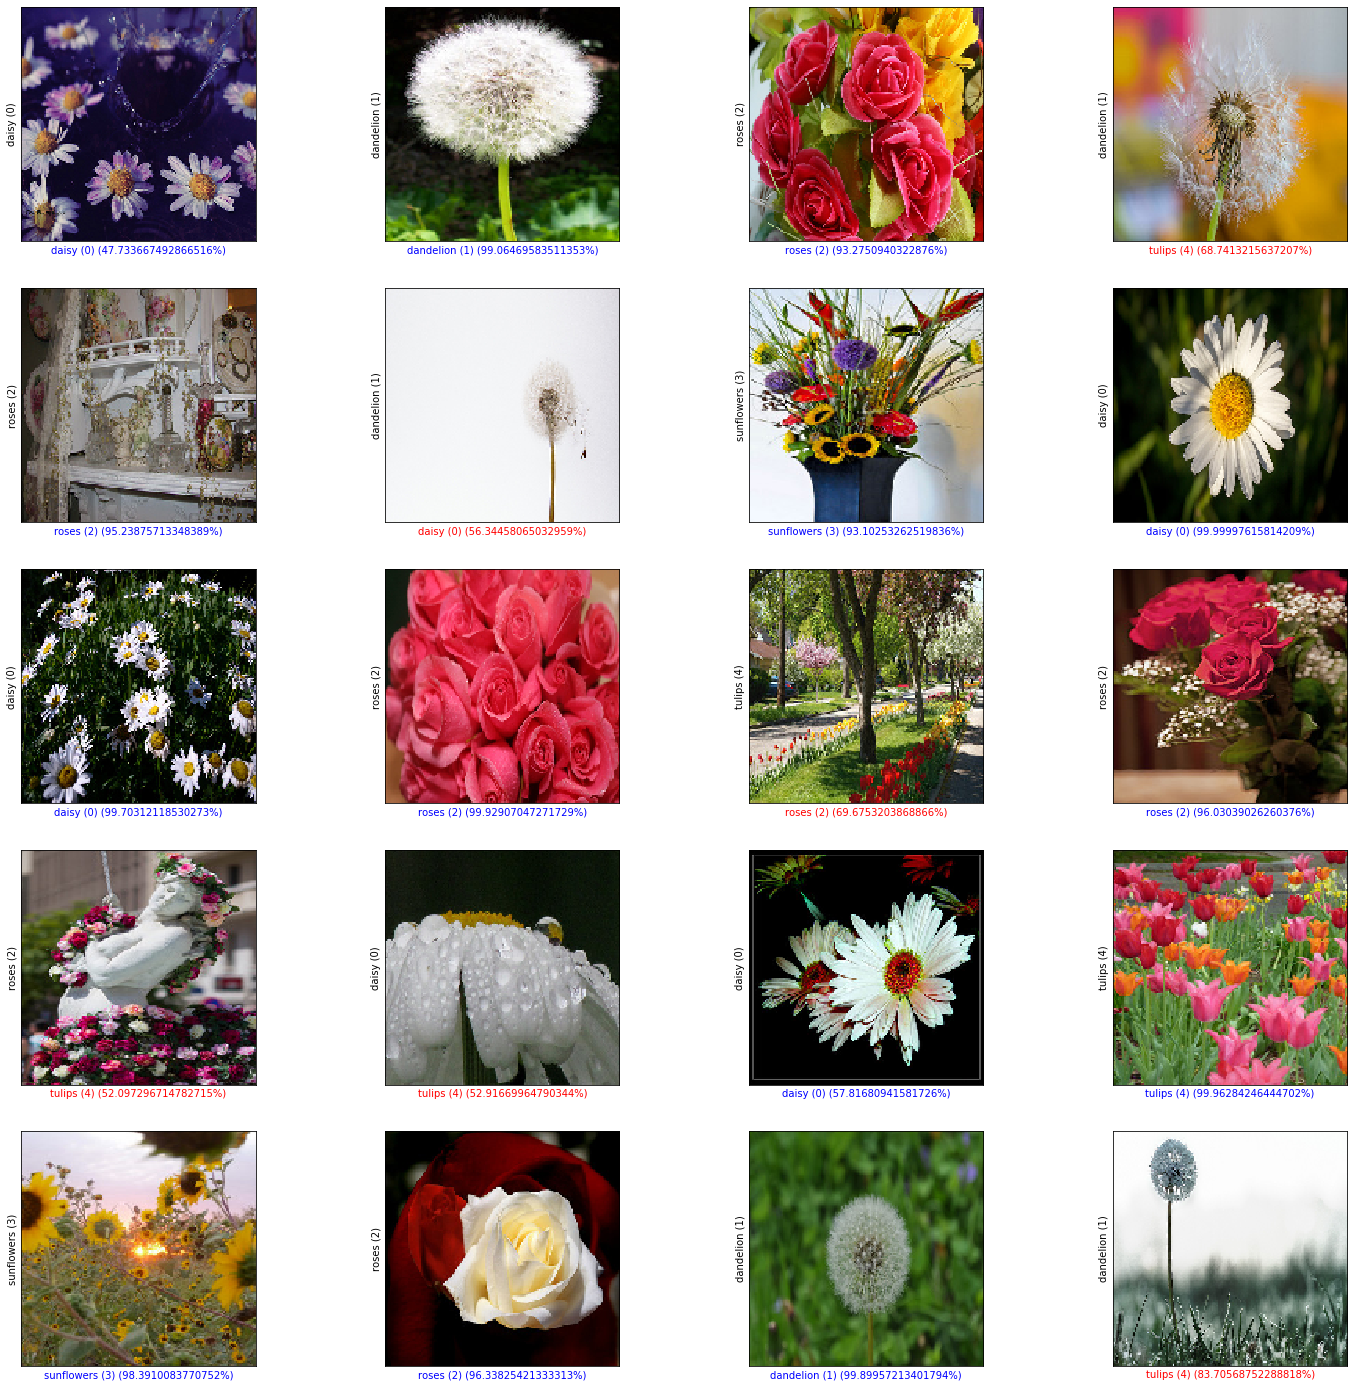

In [47]:
# Get the dataset.
image_batch, label_batch = val_data_gen[0]

# Make predictions.
total = 20
fails = 0
plt.figure(figsize=(25, 25))
for i in range(total):
  plt.subplot(5, 4, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  img = image_batch[i]
  plt.imshow(img)

  img = np.array([img])
  predict_image = model.predict(img)
  predict_id    = np.argmax(predict_image[0])
  label_id      = int(label_batch[i])
  label_predict = classes[predict_id]
  label_correct = classes[label_id]
  color = 'blue'
  if not label_id == predict_id:
    fails = fails + 1
    color = 'red'
  plt.xlabel("{} ({}) ({}%)".format(label_predict, predict_id, 100 * np.max(predict_image)), color = color)
  plt.ylabel("{} ({})".format(label_correct, label_id))

print('Classes:', classes)
print('Fails:   {}%'.format(100 * (fails/total)))
plt.show()

Our model has an accuracy about 70%, so failing about 30% is correct.